<a href="https://colab.research.google.com/github/ditumystro/Skin-detection-with-python/blob/main/Skin-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import numpy as np
from numpy import array
from matplotlib import pyplot as plt
from copy import deepcopy
import os, os.path
import pickle
from pathlib import Path
import time
from time import gmtime, strftime
import pandas as pd
import seaborn as sns
import sys


In [ ]:

#Open a simple image
img=cv2.imread("0724.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


#show results
cv2_imshow(HSV_result)
cv2_imshow(YCrCb_result)
cv2_imshow(global_result)
cv2_imshow(img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [6]:
MIDDLE_DATA_DIR = '/middle_data'
OBJECTS = ['SKIN','NON_SKIN']
DIR_TRAIN = '/content/drive/MyDrive/Dataset8_Abdomen/train/original_images/'
DIR_TEST  = '/content/drive/MyDrive/Dataset8_Abdomen/test/original_images/'
EXT= '.jpg'
DIR_TRAIN_M = '/content/drive/MyDrive/Dataset8_Abdomen/train/skin_masks/'

SCALE = 1

HISTS = []

len(OBJECTS)
nbre_img = len([name for name in os.listdir(DIR_TRAIN) if os.path.isfile(os.path.join(DIR_TRAIN, name))])
#nbre_img /=len(OBJECTS)+1
nbre_img = int(nbre_img)
nbre_img

1200

In [ ]:
def train(OBJECTS, EXTENSION=EXT, SAVE_INTERMEDIATE_DATA=False, SHOW=True):
	#Welcome message
	print('-     - ------ -     ----   ---  - _ -  ----   -----  --- ')
	
	#Initilization of histograms
	for i in range(0,len(OBJECTS)):
		# Filling 0 value to all
		HISTS.append([[0] * 256  for i in range(256)])
  
  nbre_img = len([name for name in os.listdir(DIR_TRAIN) if os.path.isfile(os.path.join(DIR_TRAIN, name))])
  ###nbre_img /=len(OBJECTS)+1
	nbre_img = int(nbre_img)
	

	# Looping through images in dataset
	print(nbre_img)
	print('****************')
	print('STARTED TRAIN :'+strftime("%Y-%m-%d %H:%M:%S", gmtime()))
	print('****************')
	
	masks = []
	images_lab = []
	images = []
	for filename in os.listdir(DIR_TRAIN):
    img = cv2.imread(os.path.join(DIR_TRAIN,filename))
    images.append(img)
		img_orig_lab = cv2.cvtColor((img/SCALE).astype(np.uint8), cv2.COLOR_BGR2LAB)
		images_lab.append(img_orig_lab)

	for filename in os.listdir(DIR_TRAIN_M):
		mas = cv2.imread(os.path.join(DIR_TRAIN_M,filename))
		masks.append(mas)
	 
	for i in range(0,nbre_img):
		
		print('Image [',str(i+1),']..................................['+str(i+1)+'/'+str(nbre_img)+']')
		##### Original image
		orig = str(i+1)+EXTENSION
		img_orig = cv2.imread(DIR_TRAIN+'/'+orig)

		##### Conversion to CIELAB space
		#print(img_orig)
		img_orig_lab = cv2.cvtColor((img_orig/SCALE).astype(np.uint8), cv2.COLOR_BGR2LAB)

		##### Filename every class
		#fnames = []
		#for k in range(0, len(OBJECTS)):
		#	fnames.append(str(i+1)+CLASS_SUFFIXES[k]+EXTENSION)

		##### Mask Images for every class
		#masks = []
		#for k in range(0, len(OBJECTS)):
		#	masks.append(cv2.imread(DIR_TRAIN+'/'+fnames[k],0))
		
		##### Shape size for loop
		h = img_orig.shape[0]
		w = img_orig.shape[1]

		##### Looping through pixels
		for y in range(0, h-1):
			for x in range(0, w-1):
				# Temporary variables for A&B [We ignore the L]
				tmp_a = img_orig_lab[y,x][1]
				tmp_b = img_orig_lab[y,x][2]

				for k in range(0, len(CLASS_SUFFIXES)):
				# Increment count in HISTS[k] according to mask value
					if(masks[k][y,x] != 0):
						HISTS[k][tmp_a][tmp_b] +=1
						DATA_PIX[k]+=1
				DATA_PIX[2]+=1

		if(SAVE_INTERMEDIATE_DATA):
	  		for o in range(0,len(OBJECTS)):
	  			cv2.imwrite(INTERMEDIATE_DATAS_DIR+'/'+str(i)+CLASS_SUFFIXES[o]+'_masked_by_'+OBJECTS[o]+EXTENSION, cv2.bitwise_and(img_orig,img_orig,mask = masks[o]))
		  	if(not Path(SAVED_VALUES_DIR).is_dir()):
		  		os.mkdir(SAVED_VALUES_DIR)
		  	if(not Path(SAVED_VALUES_DIR+'/'+CONFIG_SAVED_FILE).is_file()):
		  		os.mknod(SAVED_VALUES_DIR+'/'+CONFIG_SAVED_FILE)
		  	f = open(SAVED_VALUES_DIR+'/'+CONFIG_SAVED_FILE, "wb")
		  	f.truncate(0)
		  	pickler = pickle.Pickler(f)
		  	pickler.dump([HISTS,DATA_PIX])
	print('****************')
	print('FINISHED TRAIN :'+strftime("%Y-%m-%d %H:%M:%S", gmtime()))
	print('****************')
	if True:
		His = []
		##### Histogramm normalization to get values between [0,1]
		for k in range(0,len(HISTS)):
			His.append([array(x) / DATA_PIX[k] for x in HISTS[k]])
		for i in range(0,len(HISTS)):
			histo_file = SAVED_VALUES_DIR+'/'+'HISTOGRAM_NORMALIZED_'+OBJECTS[i]+'.csv'
			if(not Path(histo_file).is_file()):
				os.mknod(histo_file)
			with open(histo_file, 'w', newline='') as myfile:
				myfile.truncate(0)
				wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
				wr.writerow(His[i])
			histo_file = SAVED_VALUES_DIR+'/'+'HISTOGRAM_'+OBJECTS[i]+'.csv'
			if(not Path(histo_file).is_file()):
				os.mknod(histo_file)
			with open(histo_file, 'w', newline='') as myfile:
				myfile.truncate(0)
				wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
				wr.writerow(HISTS[i])
	f = open(SAVED_VALUES_DIR+'/'+CONFIG_SAVED_FILE, "wb")
	f.truncate(0)
	pickler = pickle.Pickler(f)
	pickler.dump([HISTS,DATA_PIX])
	return HISTS

In [ ]:
HISTS = train(CLASSES,EXT,True, False)


In [13]:
# chargement des images originales et masks

masks = []
images_lab = []
images = []
for filename in os.listdir(DIR_TRAIN):
  img = cv2.imread(os.path.join(DIR_TRAIN,filename))
  images.append(img)

for filename in os.listdir(DIR_TRAIN_M):
	mas = cv2.imread(os.path.join(DIR_TRAIN_M,filename))
	masks.append(mas)
  
images_matrice = np.array(images)
masks_matrice = np.array(masks)

masks_matrice



array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
        

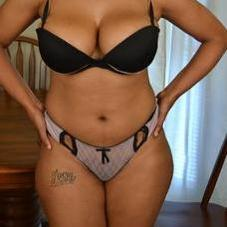

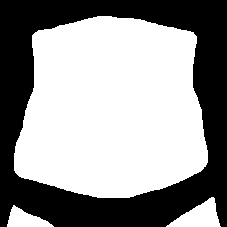

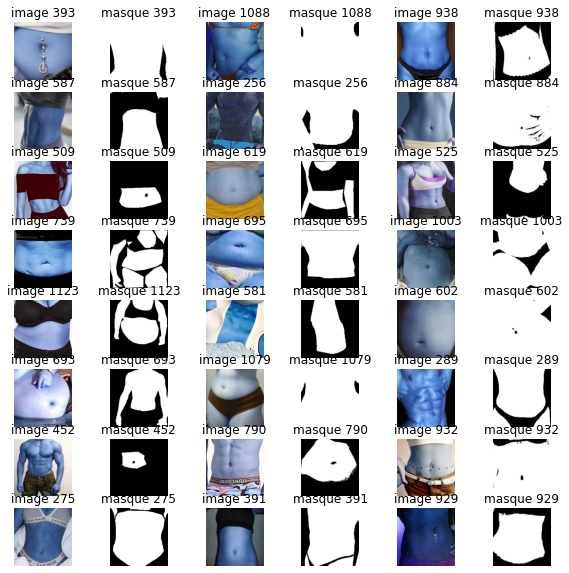

In [17]:
# affichage de certaines images et leurs masques

cv2_imshow(images[1])
cv2_imshow(masks[1])

plt.figure(figsize=(10, 10))
for k,i in np.ndenumerate(np.random.randint(images_matrice.shape[0], size=24)):
  ax = plt.subplot(8, 6, 2*k[0] + 1)
  plt.imshow(images_matrice[i], cmap='gray')
  plt.title('image {}'.format(i))
  plt.axis("off")

  bx=plt.subplot(8, 6, 2*k[0] +2)
  plt.imshow(masks_matrice[i], cmap='gray')
  plt.title('masque {}'.format(i))
  plt.axis("off")

In [ ]:
#converton de l'espace de couleur de RGB en LAB



#Affichage de certaines images dans l'espace Lab 